# Data Preprocessing and EDA

## Link for the dataset:
https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification

## Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
import os


## Path to the data folder

In [4]:
folder_path = '/Users/ayush/Desktop/DS_Proj/'
data_path = folder_path +  '/Data' 
music_files = data_path + '/genres_original'
print(list(os.listdir(music_files)))

['pop', '.DS_Store', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


In [5]:
# Loading a music file
y, s = librosa.load(music_files + '/blues/blues.00000.wav')


In [7]:
# Info about the music
print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', s, '\n')

print('Audio Length:', 661794/22050)

y: [ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [8]:
# Getting the audio from the music file
audio, _ = librosa.effects.trim(y)

print('Audio File:', audio, '\n')
print('Audio File shape:', np.shape(audio))

Audio File: [ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] 

Audio File shape: (661794,)


# EDA

## Sound waves of a music file

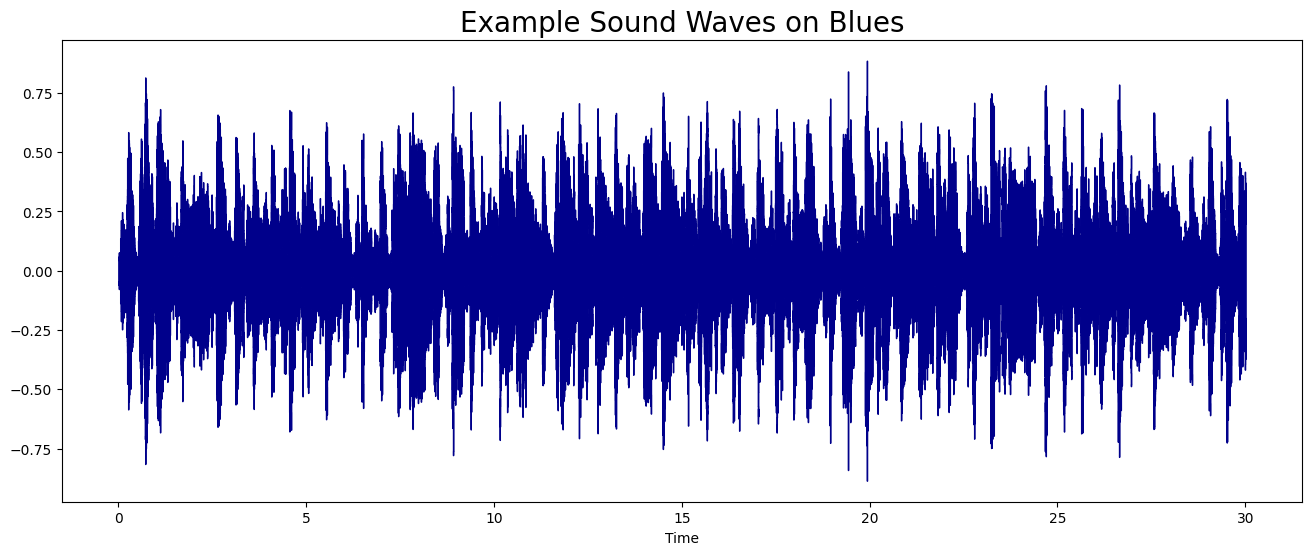

In [10]:
# Creating a figure
plt.figure(figsize = (16, 6))
# Displaying the wavelength
librosa.display.waveshow(y = audio, sr = s, color = "#00008B");
# Plotting the plot
plt.title("Example Sound Waves on Blues", fontsize = 20);

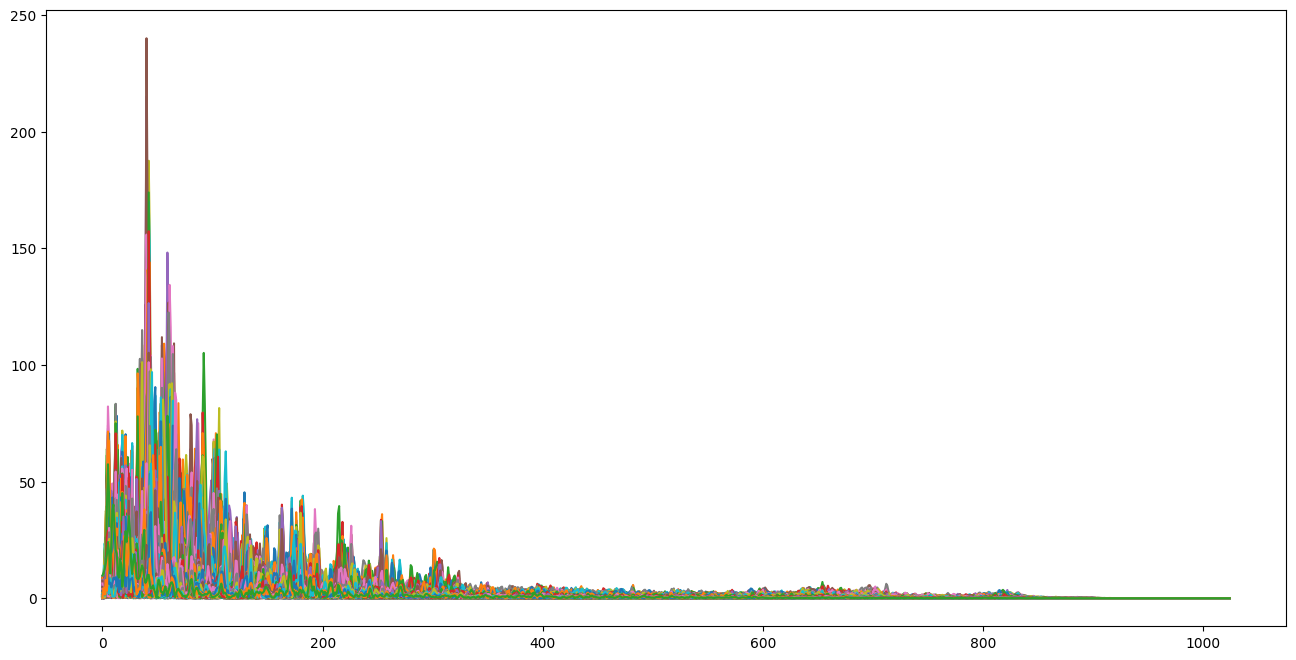

In [13]:
# Using the fourier Transformation to create a shape for the data

stft = np.abs(librosa.stft(audio, n_fft = 2048, hop_length = 512))
plt.figure(figsize = (16, 8))
plt.plot(stft);

## Decibles of the audio file

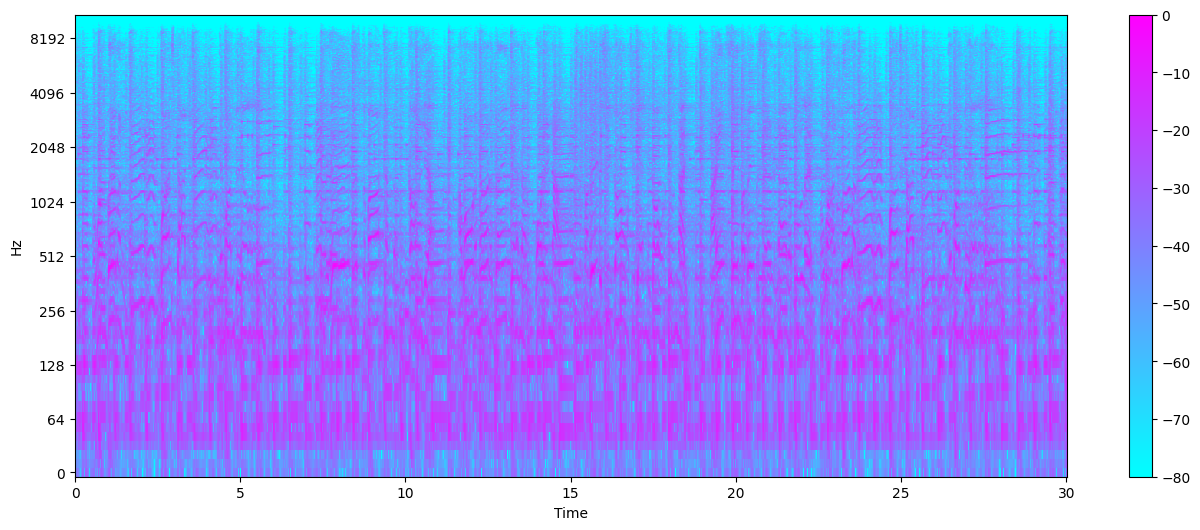

In [15]:
decibel = librosa.amplitude_to_db(stft, ref = np.max)

plt.figure(figsize = (16, 6))
librosa.display.specshow(decibel, sr = s, hop_length = 512, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();


## Mel Spectrogram

/var/folders/pr/rx1rrffd36q4ys1d_2dbyssr0000gn/T/ipykernel_43814/1247493434.py:1: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = librosa.feature.melspectrogram(y, sr=s)


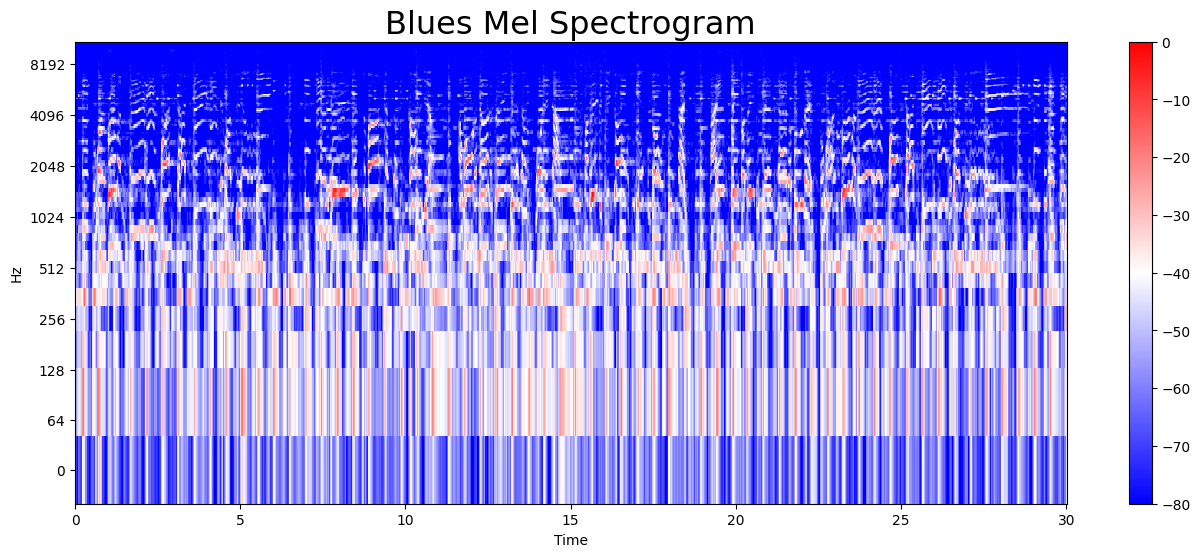

In [18]:
mel = librosa.feature.melspectrogram(y, sr=s)
mel_db = librosa.amplitude_to_db(mel, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(mel_db, sr=s, hop_length=512, x_axis = 'time', y_axis = 'log',
                        cmap = 'bwr');
plt.colorbar();
plt.title("Blues Mel Spectrogram", fontsize = 23);

## Zero-crossing

In [20]:
zero_cross = librosa.zero_crossings(audio, pad=False)
print(sum(zero_cross))

55031


## Harmonic, Precision

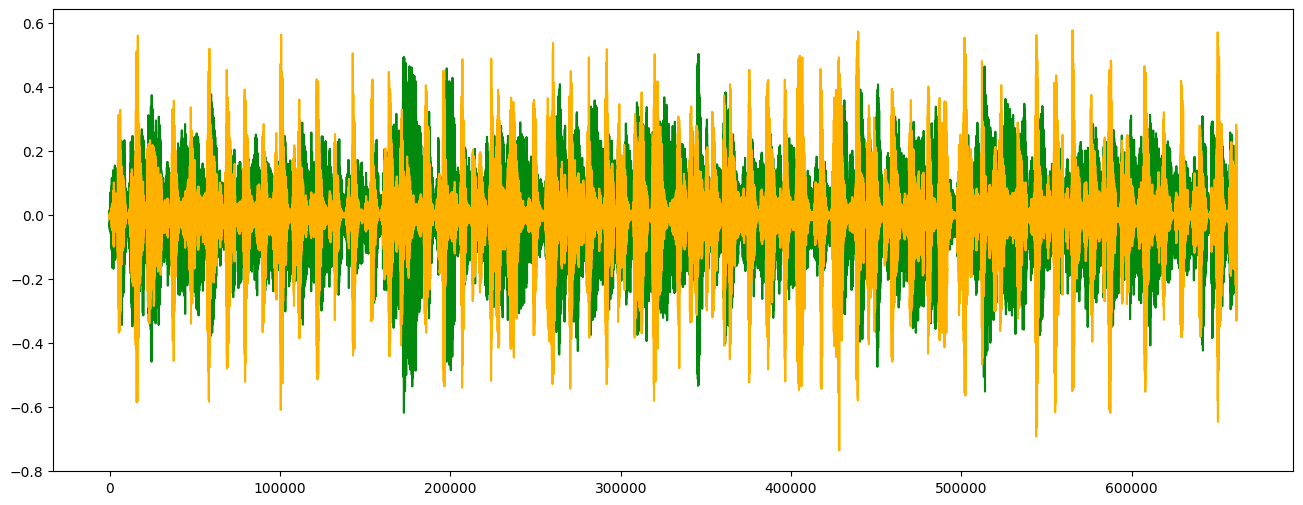

In [21]:
y_harm, y_perc = librosa.effects.hpss(audio)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#028A0F');
plt.plot(y_perc, color = '#FFB100');

## Tempo

In [25]:
tempo, _ = librosa.beat.beat_track(y, sr = s)
print(tempo)

123.046875


/var/folders/pr/rx1rrffd36q4ys1d_2dbyssr0000gn/T/ipykernel_43814/3590886910.py:1: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo, _ = librosa.beat.beat_track(y, sr = s)


## Making function to create our dataset with features such as those shown above

(20, 1293)


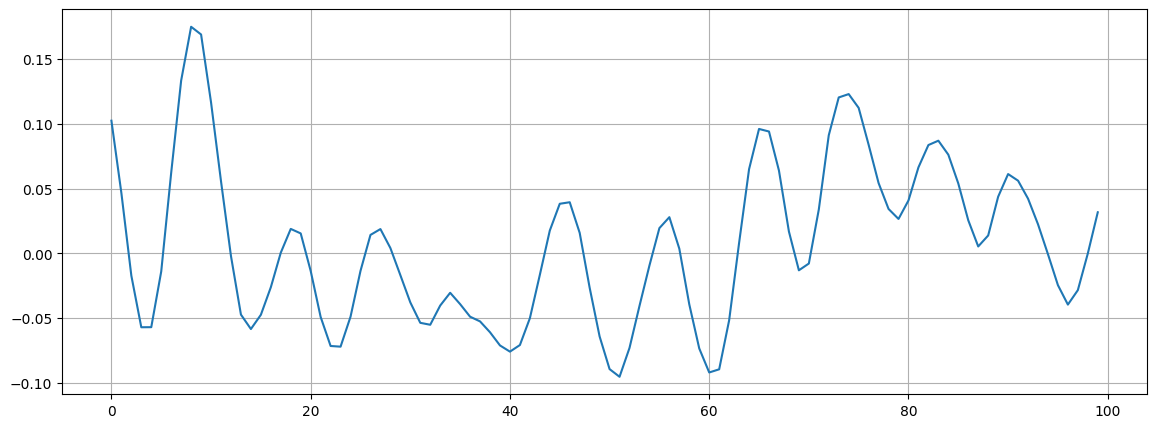

In [28]:
x, sr = librosa.load(music_files + '/blues/blues.00000.wav')

n0 = 9000
n1 = 9100

plt.figure(figsize = (14, 5))
#librosa.display.waveshow(x, sr)
plt.plot(x[n0:n1])
plt.grid()

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
# print(sum(zero_crossings))

spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

def get_mean(spectral_centroids):
    total = 0
    for i in range(0, len(spectral_centroids)):
        total = total + spectral_centroids[i]
    sc_mean = total / len(spectral_centroids)
    
    return sc_mean

spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
#librosa.display.waveshow(x, sr=sr, alpha=0.4)
#plt.plot(t, normalize(spectral_rolloff), color='r')


frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)


mfccs = librosa.feature.mfcc(y=x, sr=sr)
#librosa.display.specshow(mfccs, sr=sr, x_axis='time')

print(mfccs.shape)

In [29]:
def get_chroma_fq(x, sr):
    """
    Helps get the chromagram mean and variance of a audio file
    
    """
    chromagram = librosa.feature.chroma_stft(y=x, sr=sr)
    
    chroma_mean = np.mean(chromagram)
    chroma_var = np.var(chromagram)
    
    
    return chroma_mean, chroma_var

In [30]:
def get_rms(x, sr):
    """
    Helps get the root-mean-square of an audio file
    
    """
    randms = librosa.feature.rms(y=x)
    
    rms_mean = np.mean(randms)
    rms_var = np.var(randms)
    
    
    return rms_mean, rms_var

In [31]:
def get_bandwidth(x, sr):
    """
    Gets the bandwidth of an audio file
    
    """
    bandwith = librosa.feature.spectral_bandwidth(y=x)
    
    bandwith_mean = np.mean(bandwith)
    bandwith_var = np.var(bandwith)
    
    
    return bandwith_mean, bandwith_var

In [32]:
def get_zero_crossing_rate(x, sr):
    """
    Gets the zero_crossing_rate mean and variance from the audio file
    
    """
    cross_rate = librosa.feature.zero_crossing_rate(y=x)
    cross_rate_mean = np.mean(cross_rate)
    cross_rate_var = np.var(cross_rate)
    
    
    return cross_rate_mean, cross_rate_var

In [ ]:
def get_mfccs_vals(x, sr):
    """
    Returns a dictionary containing all the Mel-frequency cepstral coefficients  values
    
    """
    curr_dict = {}
    list_dict = []
    mfccs = librosa.feature.mfcc(y=x, sr=sr)
    
    for i in range(len(mfccs)):
        curr_dict['mfcc_mean' + str(i+1)] = [np.mean(mfccs[i])] 
        curr_dict['mfcc_var' + str(i+1)] = [np.var(mfccs[i])]
    
    return curr_dict

# Creating Our DataSet

### Already ran and saved in our submission file, please load it from below

In [ ]:
# n0 = 9000
# n1 = 9100

# zc = [] # turn into np.array later

# def get_mean(arr):
#     total = 0
#     for i in range(0, len(arr)):
#         total = total + arr[i]
#     sc_mean = total / len(arr)
    
#     return sc_mean

# for genre in list(os.listdir(music_files)):
#     try:
#         for file in list(os.listdir(music_files + '/' + genre)):
#             try:
#                 x, sr = librosa.load(music_files + '/' + genre + '/' + file)
#                 zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
#                 # Centroid Mean
#                 spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
#                 spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
#                 chroma_mean, chroma_var = get_chroma_fq(x, sr)
#                 rms_mean, rms_var = get_rms(x, sr)
#                 cross_rate_mean, cross_rate_var = get_zero_crossing_rate(x, sr)
#                 mfccs = librosa.feature.mfcc(y=x, sr=sr)
#                 current_dic = {"ID": file[0:-4], 
#                                "Zero-Crossing": sum(zero_crossings), 
#                                "Zero-Crossing-Rate Mean": cross_rate_mean,
#                                "Zero-Crossing-Rate Variance": cross_rate_var,
#                                "Chromagram Mean": chroma_mean,
#                                "Chromagram Variance": chroma_var,
#                                "RMS Mean": rms_mean,
#                                "RMS Variance": rms_var,
#                                "Spectral Centroid Mean": np.mean(spectral_centroids),
#                                "Spectral Centroid Variance": np.var(spectral_centroids),
#                                "Spectral Rolloff Mean": np.mean(spectral_rolloff),
#                                "Spectral Rolloff Variance": np.var(spectral_rolloff)}
#                 for i in range(len(mfccs)):
#                     current_dic['mfcc_mean' + str(i+1)] = np.mean(mfccs[i]) 
#                     current_dic['mfcc_var' + str(i+1)] = np.var(mfccs[i])
#                 current_dic["Label"] = genre
#                 zc.append(current_dic)
#             except:
#                 print("file " + file)
#     except:
#         print("file " + genre)

In [ ]:
#print(zc[0].keys())

In [ ]:
# df = pd.DataFrame(zc)
# df = df.sort_values(by=["ID"], ascending=True).reset_index()
# df.drop('index', inplace=True, axis=1)
# df

In [ ]:
#df.to_csv('features_3_sec.csv')

In [34]:
df = pd.read_csv('features_3_sec.csv')
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


## Creating a Correlation matrix between our features

/var/folders/pr/rx1rrffd36q4ys1d_2dbyssr0000gn/T/ipykernel_43814/650616615.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlation, dtype=np.bool))


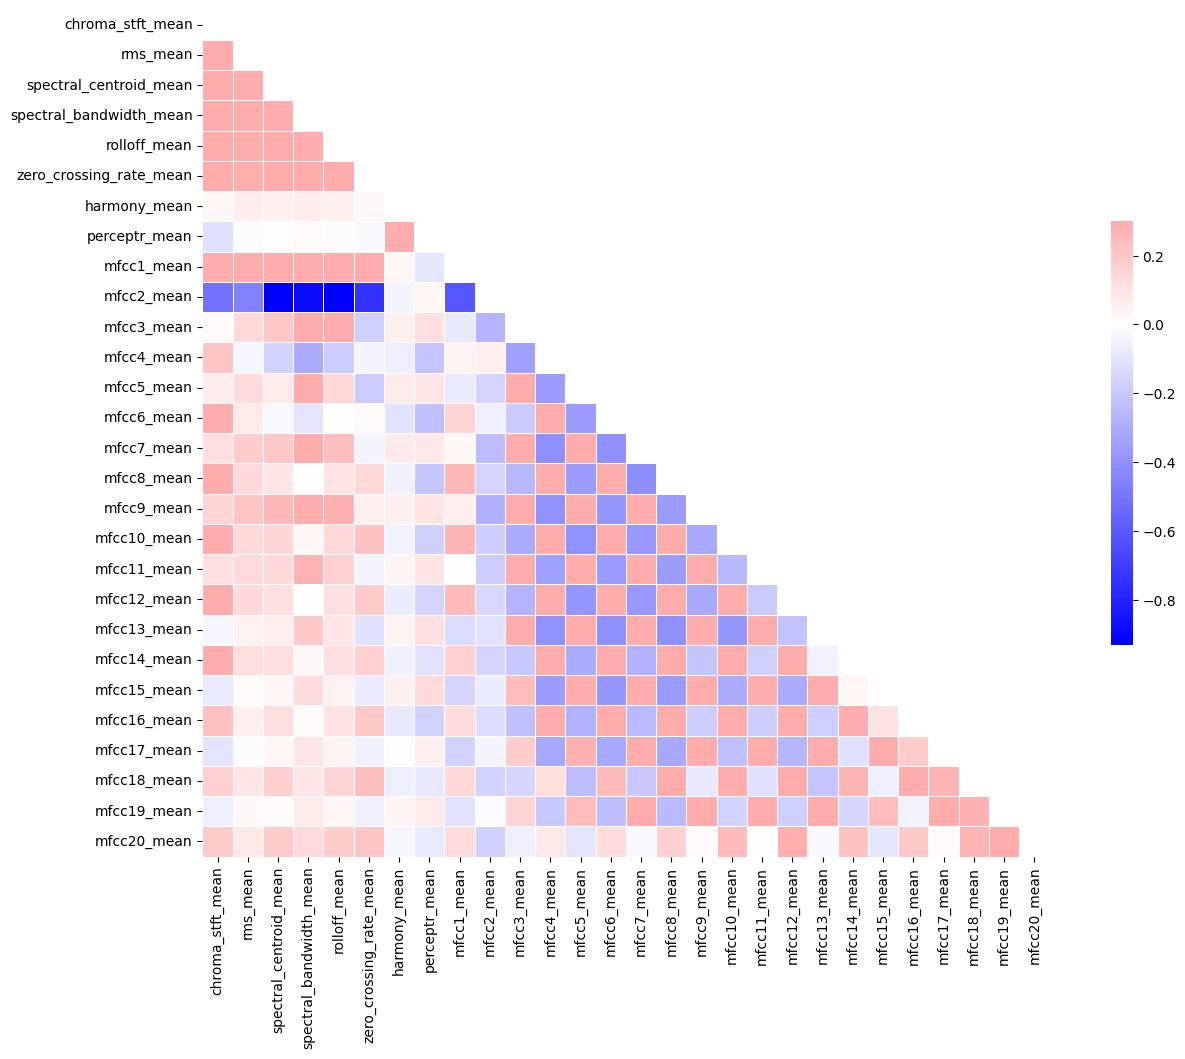

In [37]:
cols = [col for col in df.columns if 'mean' in col]
correlation = df[cols].corr()

mask = np.triu(np.ones_like(correlation, dtype=np.bool))

f, ax = plt.subplots(figsize=(16, 11));

sns.heatmap(correlation, mask=mask, cmap="bwr", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);